In [327]:
# -*- coding: utf-8 -*-

from __future__ import print_function

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.backends.cudnn as cudnn

import torchvision
import torchvision.transforms as transforms

import os

import numpy as np

import model

# Data preparation & transforms

In [328]:
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=128, shuffle=False, num_workers=4)
print('Finished')

Files already downloaded and verified
Finished


# test

In [329]:
def test():
    net.eval()
    test_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for batch_idx, (inputs, targets) in enumerate(testloader):
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = net(inputs)
            loss = criterion(outputs, targets)

            test_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()
    
    accuracy = 100.*correct/total
    print("Test Acc: {:.3f} ({:d}/{:d})".format(accuracy, correct, total))
    
    return accuracy

# print out network sparsity

In [330]:
def print_sparsity():
    num_el = 0
    num_zero = 0
    for k, v in net.state_dict().items():
        if 'conv' in k:
            num_el += v.numel()
            num_zero+=(v==0).sum().cpu().numpy()
    sparsity = 100.*num_zero/num_el
    print("Sparsity: {:.3f}%".format(sparsity))
    return sparsity

In [331]:
import collections
import matplotlib.pyplot as plt
%matplotlib inline  


In [318]:
def go_vision():
    counter = np.array([])
    for k, v in net.state_dict().items():
#         print(type(v), v)
        v = v.cpu().numpy()
        print(type(v), v.shape)
        v *=500
        v.flatten('F')
        print("VV", v.shape)
        counter = np.append(counter,v.flatten('F'))
    print(type(counter), len(counter))
    cc = []
    for i in counter:
#         if abs(i) >= 1:
        cc.append(i)
    counter = np.floor(cc)
    print(counter)
    
    return counter

In [319]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
criterion = nn.CrossEntropyLoss()

#resnet18_pruned will be changed to resnet18_fine_StudentID or resnet18_coarse_StudentID during evaluation
path = "./checkpoint/resnet18_pruned_985.t7"
net = model.resnet18()
net = net.to(device)
net.load_state_dict(torch.load(path))
CC = go_vision()

<class 'numpy.ndarray'> (64, 3, 3, 3)
VV (64, 3, 3, 3)
<class 'numpy.ndarray'> (64,)
VV (64,)
<class 'numpy.ndarray'> (64,)
VV (64,)
<class 'numpy.ndarray'> (64,)
VV (64,)
<class 'numpy.ndarray'> (64,)
VV (64,)
<class 'numpy.ndarray'> ()
VV ()
<class 'numpy.ndarray'> (64, 64, 3, 3)
VV (64, 64, 3, 3)
<class 'numpy.ndarray'> (64,)
VV (64,)
<class 'numpy.ndarray'> (64,)
VV (64,)
<class 'numpy.ndarray'> (64,)
VV (64,)
<class 'numpy.ndarray'> (64,)
VV (64,)
<class 'numpy.ndarray'> ()
VV ()
<class 'numpy.ndarray'> (64, 64, 3, 3)
VV (64, 64, 3, 3)
<class 'numpy.ndarray'> (64,)
VV (64,)
<class 'numpy.ndarray'> (64,)
VV (64,)
<class 'numpy.ndarray'> (64,)
VV (64,)
<class 'numpy.ndarray'> (64,)
VV (64,)
<class 'numpy.ndarray'> ()
VV ()
<class 'numpy.ndarray'> (64, 64, 3, 3)
VV (64, 64, 3, 3)
<class 'numpy.ndarray'> (64,)
VV (64,)
<class 'numpy.ndarray'> (64,)
VV (64,)
<class 'numpy.ndarray'> (64,)
VV (64,)
<class 'numpy.ndarray'> (64,)
VV (64,)
<class 'numpy.ndarray'> ()
VV ()
<class 'numpy.ndar

[(-6, 7), (-5, 247), (-4, 11654), (-3, 66347), (-2, 52303), (-1, 43854), (0, 42495), (1, 28095), (2, 36436), (3, 54526), (4, 10841), (5, 832), (6, 11), (7, 2)]
ASDF [-1.791759469228055, -1.6094379124341003, -1.3862943611198906, -1.0986122886681098, -0.6931471805599453, -0.0, 0, 0.0, 0.6931471805599453, 1.0986122886681098, 1.3862943611198906, 1.6094379124341003, 1.791759469228055, 1.9459101490553132] [7, 247, 11654, 66347, 52303, 43854, 42495, 28095, 36436, 54526, 10841, 832, 11, 2]
[(-6, 7), (-5, 247), (-4, 11654), (-3, 66347), (-2, 52303), (-1, 43854), (0, 42495), (1, 28095), (2, 36436), (3, 54526), (4, 10841), (5, 832), (6, 11), (7, 2)]


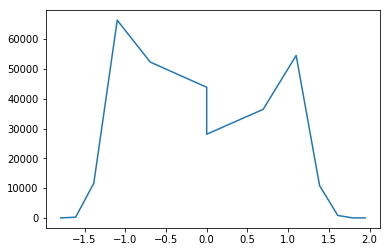

In [326]:
# print(CC)
CA = []
for i in CC:
    if i > 0:
        CA.append(int(np.log(i)))
    elif i < 0:
        CA.append(-1 * int(np.log(-i)))
# print(CA)
CB = collections.Counter(CA)
# print(CB)
pp = list(collections.Counter(CB).items())
pp.sort()
pp = pp[:-1]
print(pp)
x , y = [], []
for i in pp:
    if i[0] > 0:
        x.append(np.log(i[0]))
    elif i[0] < 0:
        x.append(-np.log(-i[0]))
    else:
        x.append(0)
        
    y.append(i[1])
print("ASDF", x, y)
print(pp)
plt.plot(x, y)
plt.show()

# I'll use the following functions to evaluate your pruned model
## Make sure your saved checkpoint can run this on 414 server

In [336]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
criterion = nn.CrossEntropyLoss()

#resnet18_pruned will be changed to resnet18_fine_StudentID or resnet18_coarse_StudentID during evaluation
path = "./checkpoint/resnet18_pruned_t2_70.t7"
net = model.resnet18()
net = net.to(device)
net.load_state_dict(torch.load(path))
accuracy = test()
sparsity = print_sparsity()
#acc_threshold = 90 for fine-grained, = 85 for coarse-grained
#spar_threshold = 60 for fine=grained, = 25 for coarse-grainedgrained
acc_threshold = 85
spar_threshold = 25
if accuracy <= acc_threshold or sparsity <= spar_threshold:
    print("failed, accuracy = {:.3f}% sparsity = {:.3f}%".format(accuracy, sparsity))
else:
    print("succeeded, accuracy = {:.3f}% sparsity = {:.3f}%".format(accuracy, sparsity))
    

Test Acc: 85.570 (8557/10000)
Sparsity: 69.837%
succeeded, accuracy = 85.570% sparsity = 69.837%
